In [17]:
import os
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from scipy import stats
#import statannotations
from statannot import add_stat_annotation


In [18]:
# Open datasets

data_dir = '/Users/kathleenkanaley/Desktop/grapes_from_space/data/'
data_20 = pd.read_csv(data_dir +'img_scout_dfs/2020/smr_vis_skysat_scout_2020.csv')
data_21 = pd.read_csv(data_dir +'img_scout_dfs/2021/smr_vis_skysat_scout_2021.csv')
data_22 = pd.read_csv(data_dir +'img_scout_dfs/2022/smr_vis_skysat_scout_2022.csv')

data_21 = data_21[data_21['Date']!='2021-08-03']
dfs = [data_20, data_21, data_22]

data_21.Date.unique()


array(['2021-07-07', '2021-07-27', '2021-08-10', '2021-08-17'],
      dtype=object)

In [19]:
for df in dfs:
    
    df['GDM_inc'] = 'low'
    df.loc[df['DM_inc']>25,'GDM_inc']= 'high'
    
    df['GDM_sev'] = 'low'
    df.loc[df['DM_severity']>10,'GDM_sev']= 'high'
    
    df.loc[df['ndvi']<=0.65,'ndvi_group']= '<0.65'
    df.loc[(df['ndvi']> 0.65)&(df['ndvi']<=0.7),'ndvi_group']='0.66-0.70'
    df.loc[(df['ndvi']> 0.7)&(df['ndvi']<=0.75),'ndvi_group']='0.71-0.75'
    df.loc[(df['ndvi']> 0.75)&(df['ndvi']<=0.8),'ndvi_group']='0.76-0.80'
    df.loc[(df['ndvi']> 0.8)&(df['ndvi']<=0.85),'ndvi_group']='0.81-0.85'
    df.loc[(df['ndvi']> 0.85),'ndvi_group']='>0.85'


# 1. EVI binned by NDVI - 6 plots

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.485e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.027e-04 U_stat=1.300e+01
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.075e-02 U_stat=9.230e+02
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.360e-02 U_stat=1.558e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


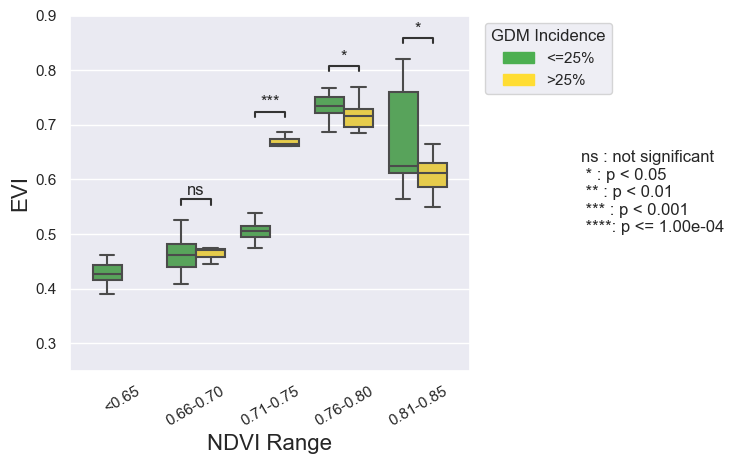

In [20]:
#Incidence 2020

x = "ndvi_group"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),

    ]
sns.set_theme(style="darkgrid")
sns.set(font="Arial")
colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticks(range(len(order)))
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by NDVI Range 2020", fontsize=20)


plt.tight_layout()
# plt.savefig("fig3_inc_2020_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.960e-01 U_stat=1.600e+01


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.809e-02 U_stat=5.420e+02
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.543e-03 U_stat=9.750e+02


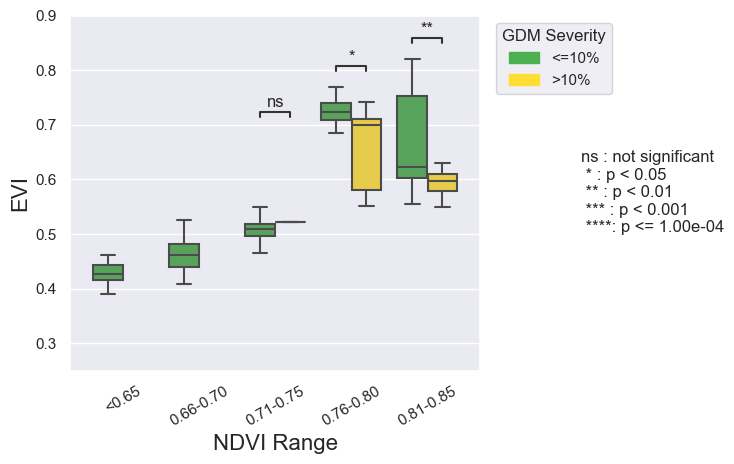

In [21]:
#EVI Severity 2020

x = "ndvi_group"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
      ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
     ((order[4], "high"), (order[4], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','> 0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by NDVI Range 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_sev_2020_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.477e+03
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.796e-02 U_stat=5.000e+00


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.940e-01 U_stat=1.234e+04
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.260e-05 U_stat=1.370e+04
0.81-0.85_low v.s. 0.81-0.85_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.500e+01


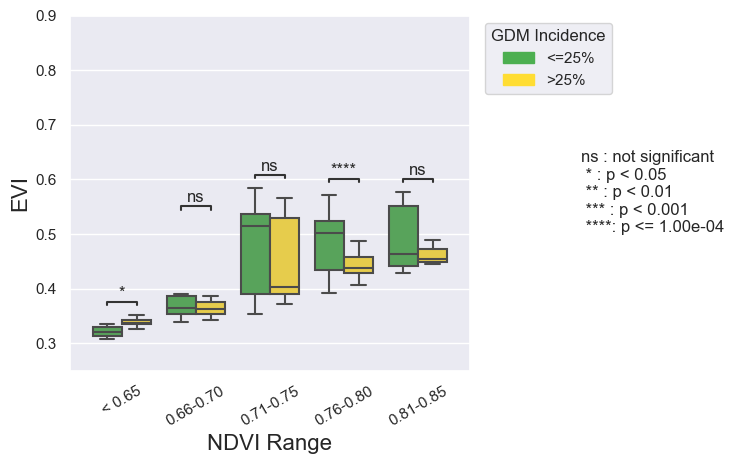

In [22]:
# EVI Incidence 2021

x = "ndvi_group"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
    #((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2021_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.084e-01 U_stat=1.229e+03
<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.211e-01 U_stat=9.000e+00
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.740e-02 U_stat=9.085e+03
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.567e-06 U_stat=8.120e+03


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


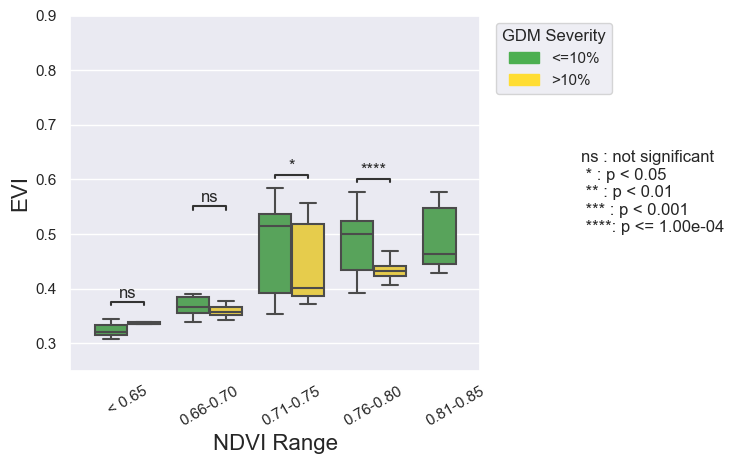

In [23]:
# EVI Severity 2021
x = "ndvi_group"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '>0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['< 0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85','>0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by NDVI Range 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_sev_2021_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.300e+01


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.037e-03 U_stat=1.329e+03
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=8.620e+02
0.76-0.80_low v.s. 0.76-0.80_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.000e+00


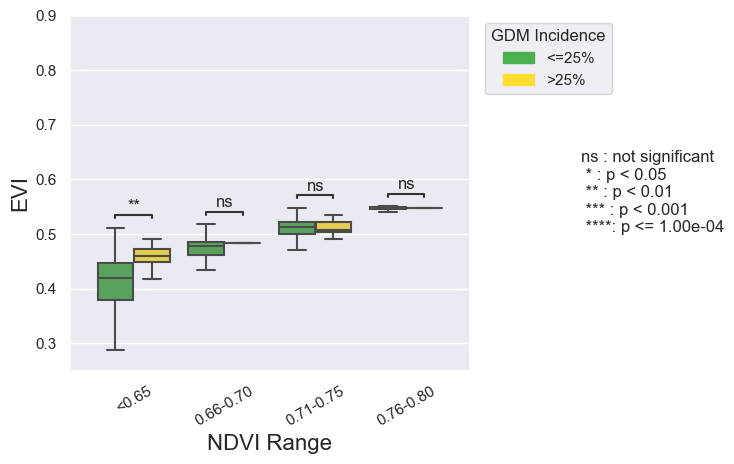

In [24]:
# EVI Incidence 2022

#Incidence 2022
x = "ndvi_group"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'],
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig3_inc_2022_fullrange.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

0.66-0.70_low v.s. 0.66-0.70_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.100e+01


/Users/kathleenkanaley/miniconda3/envs/planetenv/lib/python3.10/site-packages/statannot/statannot.py:337: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = box_plotter.plot_hues[index] == hue_level


<0.65_low v.s. <0.65_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.500e-02 U_stat=5.190e+02
0.71-0.75_low v.s. 0.71-0.75_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.540e+02


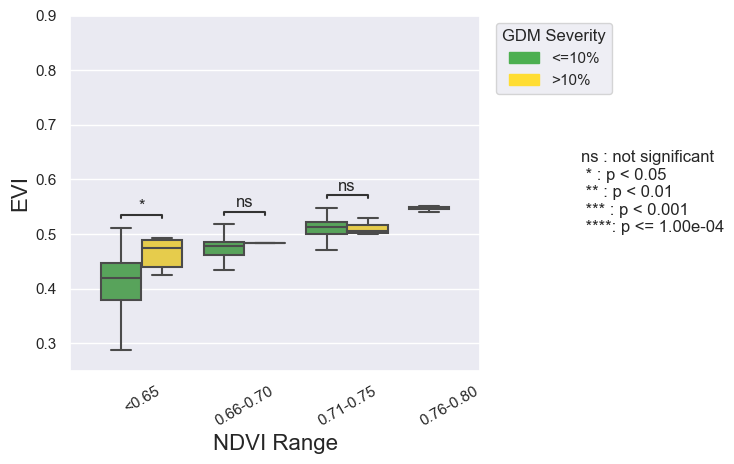

In [25]:
# EVI Severity 2022
x = "ndvi_group"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85']
pairs=[
    ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
#     ((order[3], "high"), (order[3], "low")),
#     ((order[4], "high"), (order[4], "low")),
#     ((order[5], "high"), (order[5], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['<0.65','0.66-0.70','0.71-0.75','0.76-0.80','0.81-0.85', '> 0.85'], 
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("NDVI Range", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by NDVI Range 2022", fontsize=20)

plt.tight_layout()

# plt.savefig("fig3_sev_2022_fullrange.svg")

# 2. EVI binned by date - 6 plots

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.172e-01 U_stat=4.660e+02
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.910e-04 U_stat=1.208e+03


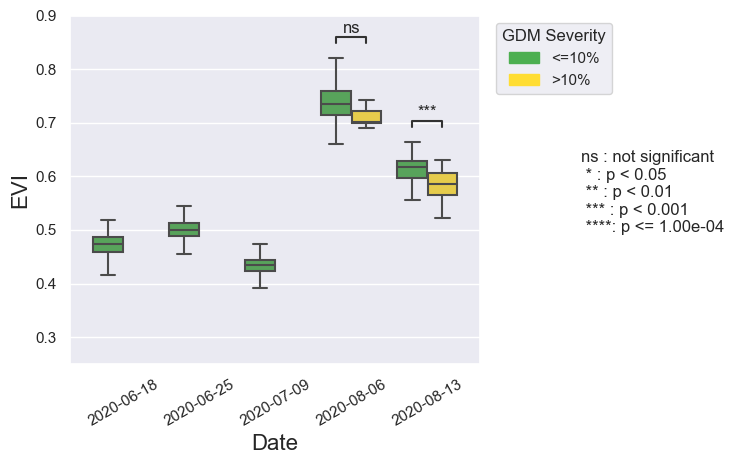

In [26]:
#Severity 2020

x = "Date"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
#     ((order[2], "high"), (order[2], "low")),
      ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2020-07-09_low v.s. 2020-07-09_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.773e-02 U_stat=2.150e+01
2020-08-06_low v.s. 2020-08-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.011e-04 U_stat=1.758e+03
2020-08-13_low v.s. 2020-08-13_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.884e-02 U_stat=1.618e+03


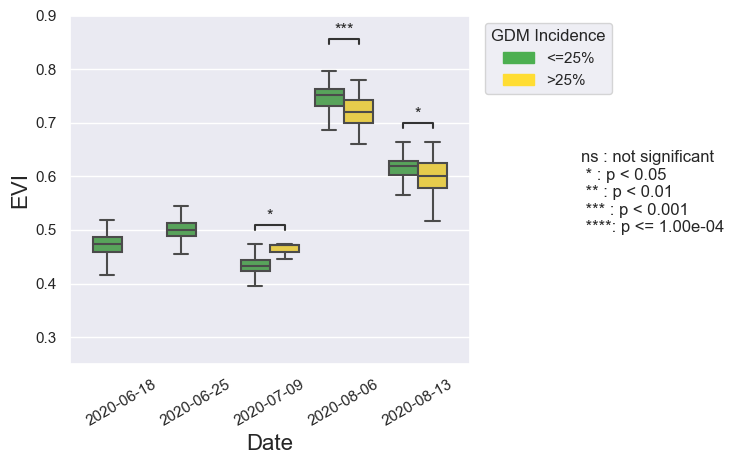

In [27]:
#Inc 2020

x = "Date"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06',
       '2020-08-13']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
     ((order[3], "high"), (order[3], "low")),
    ((order[4], "high"), (order[4], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_20, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2020-06-18', '2020-06-25', '2020-07-09', '2020-08-06','2020-08-13'], 
                   rotation=30)
add_stat_annotation(ax, data=data_20, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by Date 2020", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2020.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.813e+03
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.671e-01 U_stat=4.109e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.043e+03


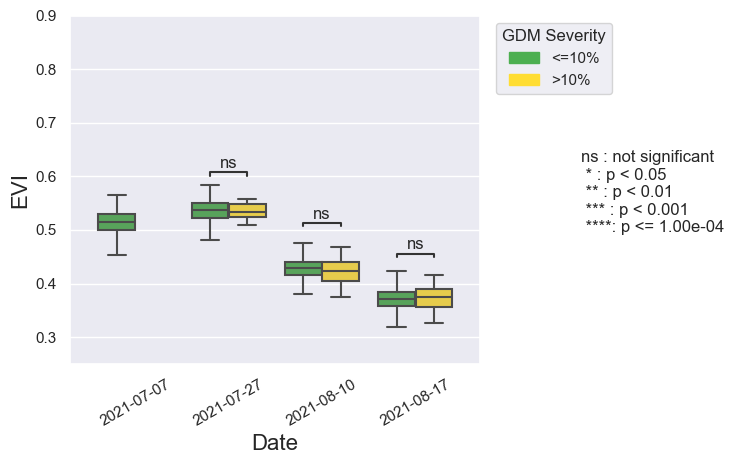

In [28]:
#Severity 2021

x = "Date"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-10',
       '2021-08-17']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
#     ((order[1], "high"), (order[1], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-10','2021-08-17'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2021-07-27_low v.s. 2021-07-27_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=2.996e+03
2021-07-07_low v.s. 2021-07-07_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.510e+02
2021-08-10_low v.s. 2021-08-10_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.004e-01 U_stat=4.463e+03
2021-08-17_low v.s. 2021-08-17_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.074e-02 U_stat=4.329e+03


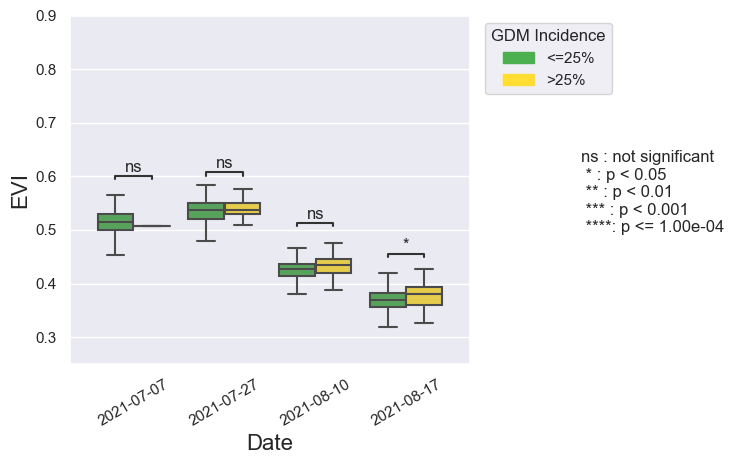

In [29]:
#Inc 2021

x = "Date"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2021-07-07', '2021-07-27', '2021-08-10','2021-08-17']
pairs=[
     ((order[0], "high"), (order[0], "low")),
     ((order[1], "high"), (order[1], "low")),
     ((order[2], "high"), (order[2], "low")),
    ((order[3], "high"), (order[3], "low")),
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2021-07-07', '2021-07-27', '2021-08-10','2021-08-17'], 
                   rotation=30)
add_stat_annotation(ax, data=data_21, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by Date 2021", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2021.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-06_low v.s. 2022-07-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.370e-01 U_stat=4.680e+02
2022-07-20_low v.s. 2022-07-20_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=4.590e+02


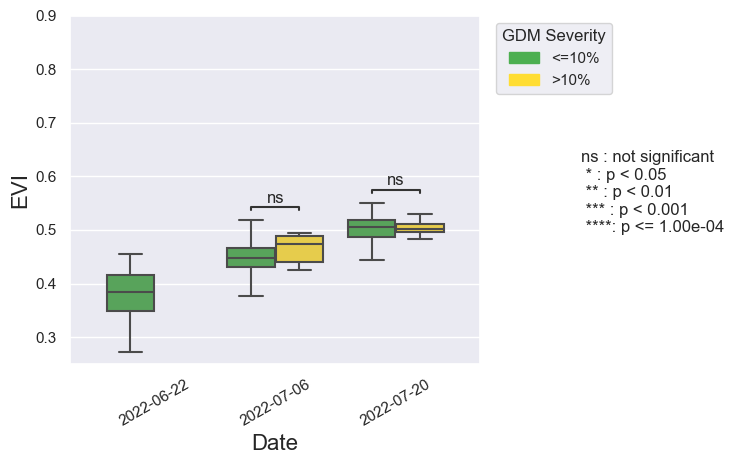

In [30]:
#Severity 2022

x = "Date"
y = "evi"
hue = "GDM_sev"
hue_order=['low', 'high']
order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
    ((order[2], "high"), (order[2], "low")),

    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue,hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=10%')
high_patch = mpatches.Patch(color='#FFDD33', label='>10%')

plt.legend(title='GDM Severity',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_sev_2022.svg")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

2022-07-06_low v.s. 2022-07-06_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.461e-01 U_stat=1.006e+03
2022-07-20_low v.s. 2022-07-20_high: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.697e-01 U_stat=1.111e+03


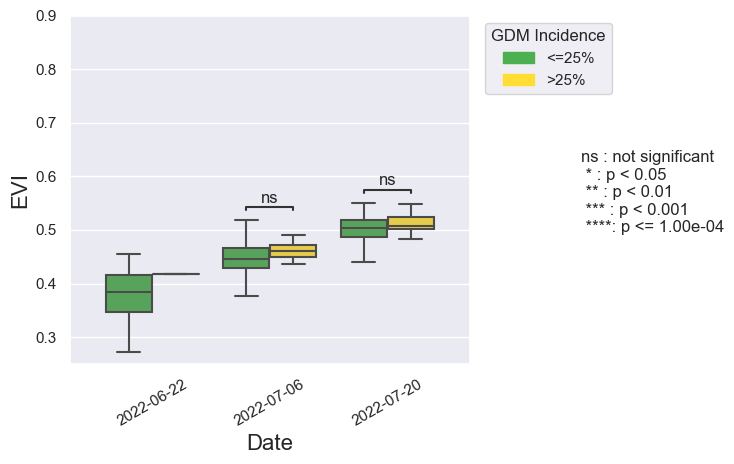

In [31]:
#Inc 2022

x = "Date"
y = "evi"
hue = "GDM_inc"
hue_order=['low', 'high']
order = ['2022-06-22', '2022-07-06', '2022-07-20']
pairs=[
#     ((order[0], "high"), (order[0], "low")),
    ((order[1], "high"), (order[1], "low")),
((order[2], "high"), (order[2], "low"))
    ]

colors = ["#4CAF50", "#FFDD33"]
sns.set_palette(sns.color_palette(colors))
#sns.set(font="Tahoma")

ax = sns.boxplot(data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, showfliers = False)
ax.set_xticklabels(labels = ['2022-06-22', '2022-07-06', '2022-07-20'], 
                   rotation=30)
add_stat_annotation(ax, data=data_22, x=x, y=y, order=order, hue=hue, hue_order=hue_order, box_pairs=pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)


plt.xlabel("Date", fontsize=16)
plt.ylabel("EVI", fontsize= 16)

plt.ylim(0.25, 0.9)
#plt.legend(title='Disease Severity',loc='upper left', labels=['<=10%', '>10%'], bbox_to_anchor=(1.02, 1))
##
#Test creating legend artist

low_patch = mpatches.Patch(color='#4CAF50', label='<=25%')
high_patch = mpatches.Patch(color='#FFDD33', label='>25%')

plt.legend(title='GDM Incidence',
           loc='upper left',
           handles=[low_patch, high_patch],
          bbox_to_anchor=(1.02, 1))

plt.figtext(0.92, 0.5, 
            'ns : not significant\n * : p < 0.05\n ** : p < 0.01\n *** : p < 0.001\n ****: p <= 1.00e-04', 
            fontsize=12)
#plt.title("EVI by Date 2022", fontsize=20)

plt.tight_layout()
# plt.savefig("fig4_inc_2022.svg")